In [1]:
# SVM - State Vector Machine - Classification 
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [5]:
#Load data and to see the dataset
train=pd.read_csv('C:/Users/Fadilah Thasnim/Desktop/Academics/6 - Semester/3. ML/Lab/MobileClassifcationSVMTrain.csv')
test=pd.read_csv('C:/Users/Fadilah Thasnim/Desktop/Academics/6 - Semester/3. ML/Lab/MoblieclassificationSVMtest.csv')

In [6]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [8]:
df_tr = pd.DataFrame(train)
df_te = pd.DataFrame(test)
df_te.drop(columns='id',inplace=True)

In [9]:
#about the data
df_tr.info()
print("------------------------------------------------------")
print("------------------------------------------------------")
df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

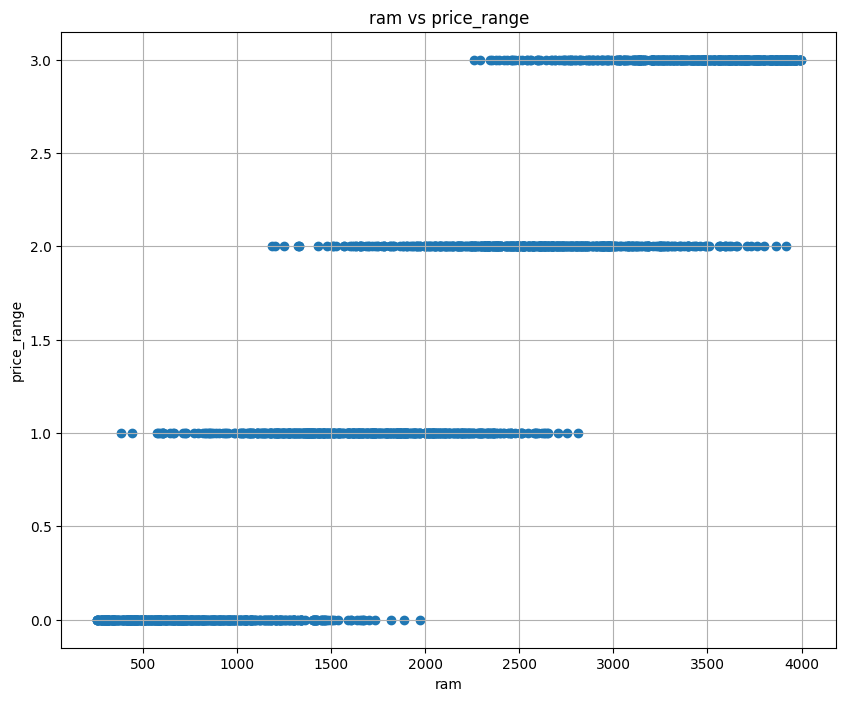

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(df_tr['ram'] , df_tr['price_range'])
plt.title('ram vs price_range')
plt.xlabel('ram')
plt.ylabel('price_range')
plt.grid()
plt.show()

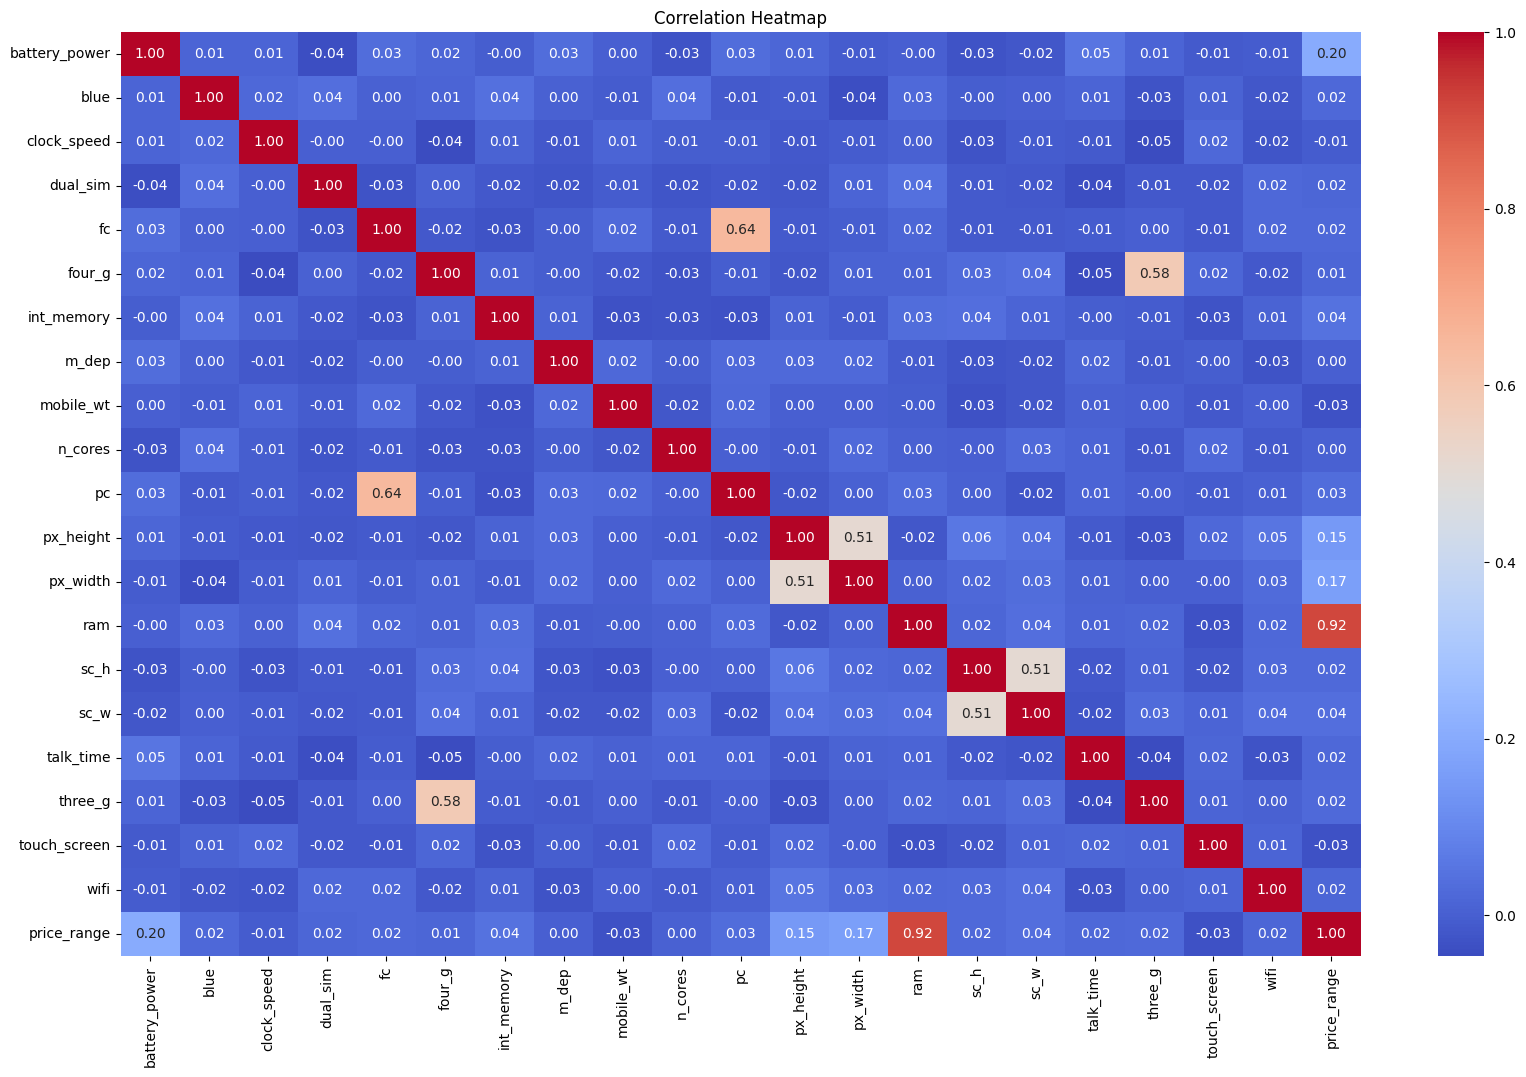

In [11]:
correlation_matrix = df_tr.corr()

# Heatmap chart
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# setting
plt.title('Correlation Heatmap')
plt.show()

In [12]:
x = df_tr.drop(columns='price_range')
y = df_tr.price_range.values.reshape(-1,1)

In [13]:
scaler = MinMaxScaler()
columns = x.columns
x = pd.DataFrame(scaler.fit_transform(x))
x.columns = columns
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

C:\Users\Fadilah Thasnim\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The mean absolute error:
0.148

Accuracy score:
0.852

Accuracy =  85.2  %
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       124
           1       0.78      0.82      0.80       110
           2       0.74      0.82      0.78       125
           3       0.97      0.83      0.89       141

    accuracy                           0.85       500
   macro avg       0.86      0.85      0.85       500
weighted avg       0.86      0.85      0.85       500


Confusion matrix: 
[[116   8   0   0]
 [  7  90  13   0]
 [  0  18 103   4]
 [  0   0  24 117]]



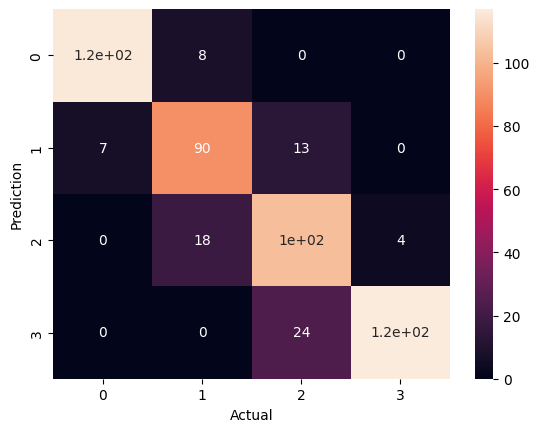

In [15]:
#Creating and fitting the model, as well as generating predictions
svm_model = SVC(random_state=0)
svm_model.fit(x_train, y_train)
preds = svm_model.predict(x_test)

#Model evaluation
#Mean absolute error

print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

#Accuracy score

svm_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(svm_model_accuracy))
svm_model_accuracy = round(accuracy_score(y_test, preds)*100,2)
print('Accuracy = ' , svm_model_accuracy ,' %')
accuracies = pd.DataFrame({"Algorithm":["SVM"], "Score":[svm_model_accuracy]})


#Classification report

print("Classification report: \n{}\n".format(classification_report(y_test, preds)))

#Confusion matrix

print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))
sns.heatmap(data=confusion_matrix(y_test, preds), annot=True, xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show()

C:\Users\Fadilah Thasnim\AppData\Local\Temp\ipykernel_14948\2065679984.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_tr['n_cores'], df_tr['battery_power'], c=colors, cmap='winter')


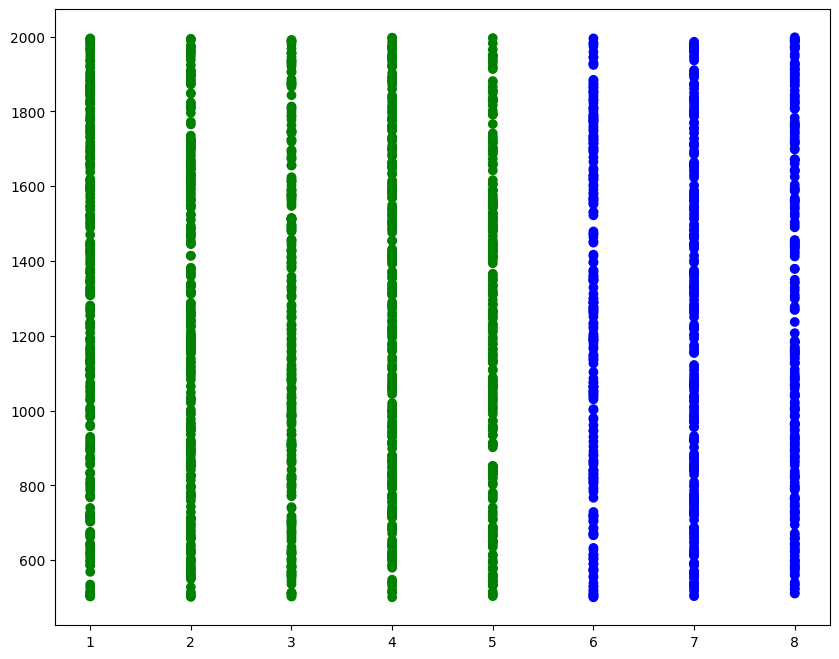

In [21]:
plt.figure(figsize=(10,8))
colors = ['blue' if x >= 6 else 'green' for x in df_tr['n_cores']]
plt.scatter(df_tr['n_cores'], df_tr['battery_power'], c=colors, cmap='winter')